In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from pprint import pprint
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/file/d/1UEYUxnCd5ro8st1XgHnloj5IUPE7L6gy/view?usp=drivesdk'    #getting drive link 
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dataset.csv')
df = pd.read_csv('dataset.csv')
print(df)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [ ]:
df.shape

(4177, 9)

Visualizations

1.Univariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


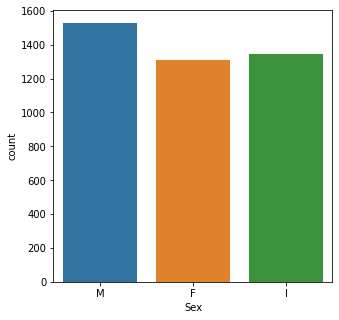

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(df.Sex)

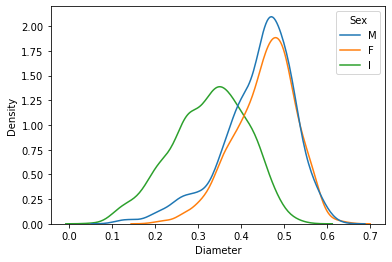

In [ ]:
colors = sns.color_palette()
sns.kdeplot(data=df, x="Diameter", hue="Sex")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2748852350>,
      dtype=object)

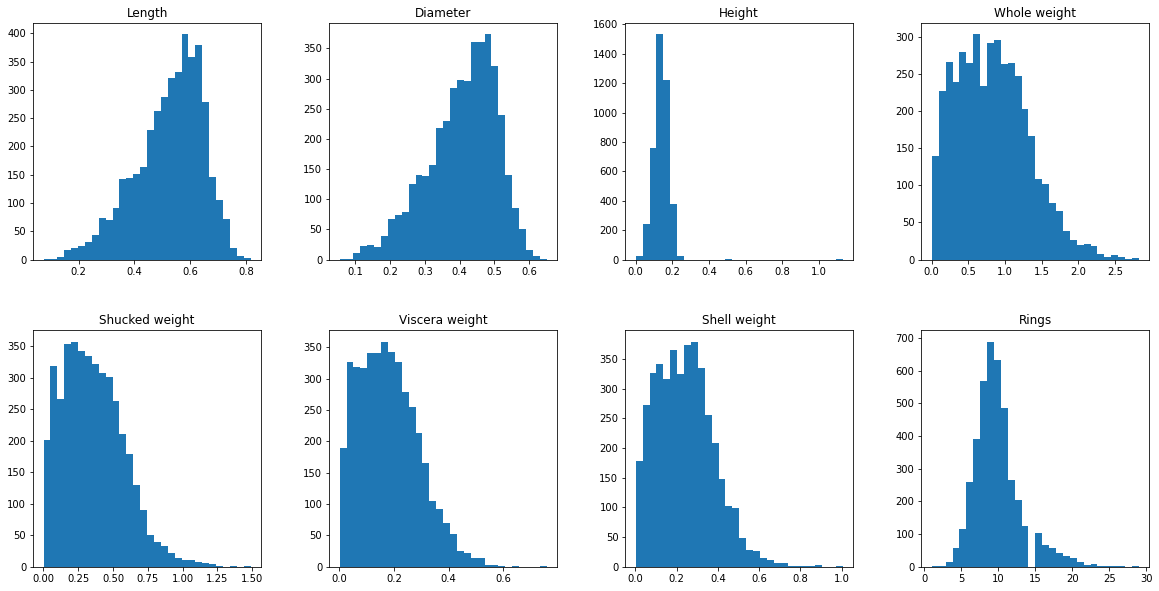

In [ ]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

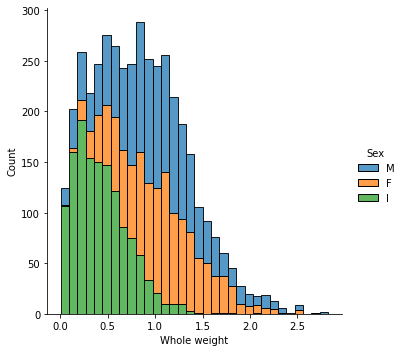

In [ ]:
sns.displot(data=df, x="Whole weight", hue="Sex", multiple="stack")

2.Bivariate Analysis

Text(0.5, 1.0, 'Rings vs Weight')

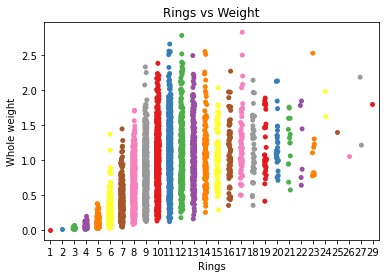

In [ ]:
sns.stripplot(data=df, x="Rings", y="Whole weight", palette="Set1")
plt.title('Rings vs Weight')

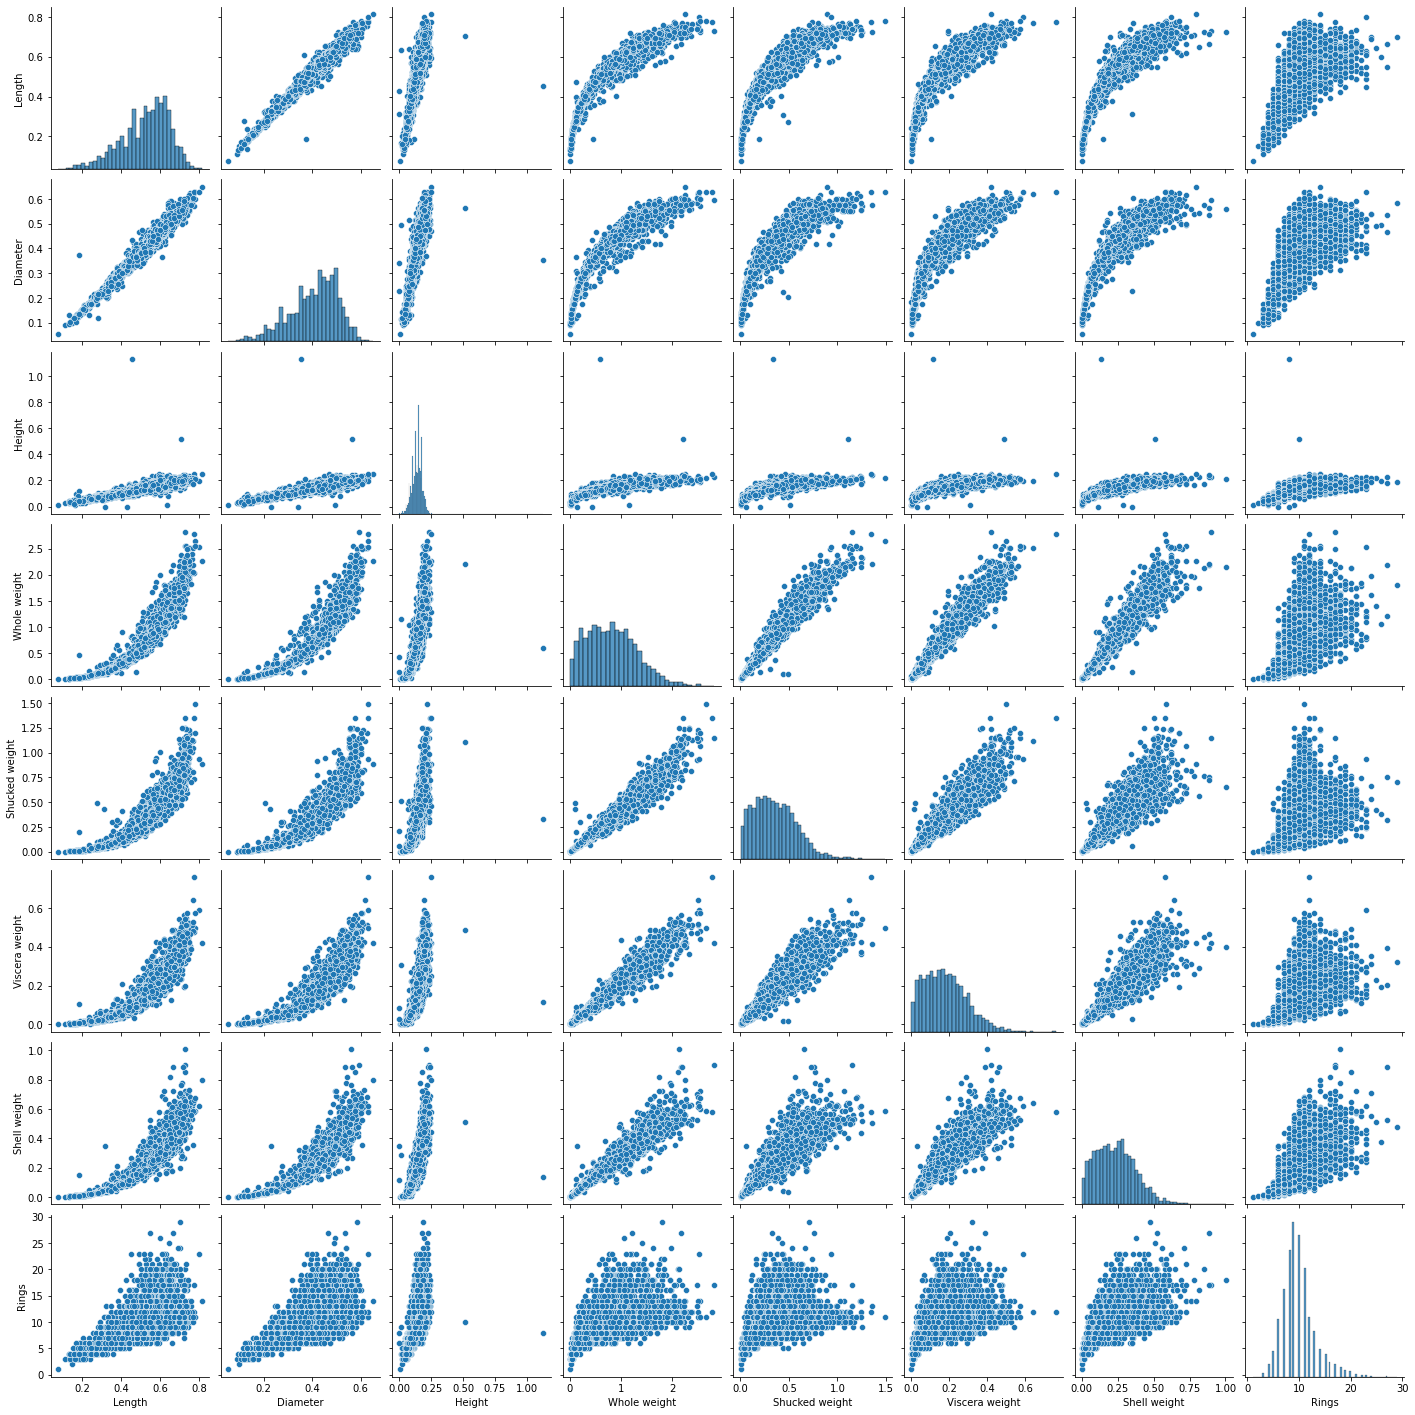

In [ ]:
numerical_features = df.select_dtypes(include = [np.number]).columns
sns.pairplot(df[numerical_features])

Text(0.5, 1.0, 'Rings vs Length (according to Sex)')

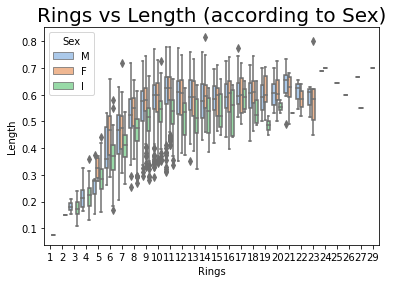

In [ ]:
sns.boxplot(data=df, x='Rings', y='Length', hue = df['Sex'], palette = 'pastel')
plt.title('Rings vs Length (according to Sex)', fontsize = 20)

<Figure size 1440x360 with 0 Axes>

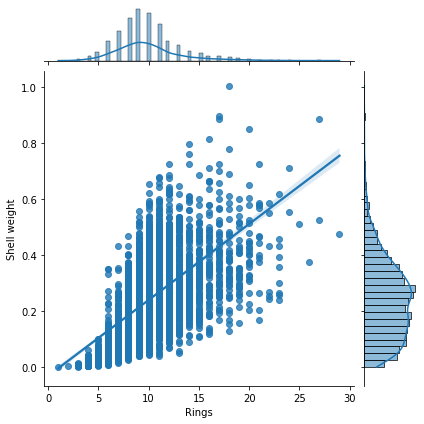

In [ ]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=df, x='Rings', y='Shell weight', kind='reg')

3.Multivariate *Analysis*

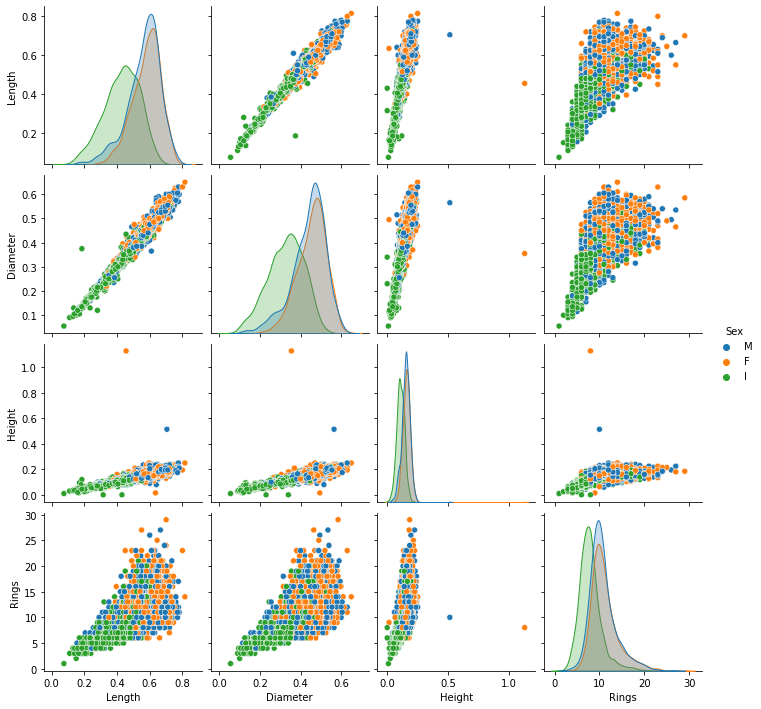

In [ ]:
plt.rcParams['figure.figsize']=10,10
sns.pairplot(df, x_vars=["Length", "Diameter", "Height", "Rings"], y_vars=["Length", "Diameter", "Height", "Rings"],hue="Sex")

Descriptive Analysis

In [ ]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Check for Missing Values

In [ ]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Finding and Replacing the outliers

In [ ]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = find_outliers_IQR(df["Shucked weight"])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 48
max outlier value: 1.488
min outlier value: 0.9815


165     1.0705
891     1.1465
1048    1.0120
1051    1.1335
1052    1.0070
1193    1.0950
1197    1.0465
1199    1.0265
1202    1.0260
1206    1.1090
1207    1.1965
1209    1.4880
1417    1.1075
1418    1.0465
1426    1.1565
1427    1.2320
1527    1.0170
1528    1.3510
1749    0.9895
1750    0.9925
1754    1.1455
1756    1.0300
1761    1.0830
1762    1.1155
1763    1.3485
1821    1.0715
1982    1.0815
2544    1.0685
2623    0.9915
2624    1.1280
2625    1.0515
2675    1.0050
2710    1.0615
2810    1.1055
2811    1.2530
2862    1.1705
2863    1.1495
2970    0.9815
2972    0.9955
3007    1.2395
3082    1.0135
3427    1.1455
3599    1.2395
3713    1.2455
3715    1.1945
3961    1.1330
3962    1.0745
3993    0.9840
Name: Shucked weight, dtype: float64

In [ ]:
median = df.loc[df['Shucked weight']<0.9815, 'Shucked weight'].median()
median

0.3325

In [ ]:
df.loc[df["Shucked weight"] >= 0.9815, 'Shucked weight'] = np.nan
df.isnull().sum()

Sex                0
Length             0
Diameter           0
Height             0
Whole weight       0
Shucked weight    48
Viscera weight     0
Shell weight       0
Rings              0
dtype: int64

In [ ]:
df.fillna(median,inplace=True)

In [ ]:
outliers = find_outliers_IQR(df["Shell weight"])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 35
max outlier value: 1.005
min outlier value: 0.63


81      0.6750
129     0.7800
157     0.6350
163     1.0050
164     0.8150
165     0.7250
166     0.8500
167     0.6500
168     0.7600
277     0.6900
334     0.7100
358     0.7000
891     0.8970
1193    0.6380
1207    0.6785
1428    0.7975
1761    0.6300
1762    0.6420
1823    0.6430
1985    0.6460
2090    0.6585
2108    0.8850
2157    0.7250
2161    0.8850
2208    0.6650
2274    0.6850
2368    0.6600
3008    0.7260
3148    0.6855
3149    0.7100
3151    0.7250
3188    0.6650
3715    0.6745
3928    0.6550
4145    0.6570
Name: Shell weight, dtype: float64

In [ ]:
median = df.loc[df['Shell weight']<0.63, 'Shell weight'].median()
median

0.23

In [ ]:
df.loc[df["Shell weight"] >= 0.63, 'Shell weight'] = np.nan
df.isnull().sum()

Sex                0
Length             0
Diameter           0
Height             0
Whole weight       0
Shucked weight     0
Viscera weight     0
Shell weight      35
Rings              0
dtype: int64

In [ ]:
df.fillna(median,inplace=True)

In [ ]:
outliers = find_outliers_IQR(df["Viscera weight"])

print("number of outliers: " + str(len(outliers)))

print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

outliers

number of outliers: 26
max outlier value: 0.76
min outlier value: 0.4925


170     0.5410
1048    0.5225
1052    0.5090
1204    0.5500
1206    0.5195
1207    0.5130
1209    0.4985
1422    0.5640
1427    0.5190
1750    0.4925
1757    0.5195
1759    0.5185
1762    0.6415
1763    0.7600
2334    0.5900
2623    0.5005
2624    0.5120
2709    0.5265
2710    0.5235
2810    0.5250
2811    0.5410
2863    0.5115
3427    0.5750
3628    0.5145
3715    0.5745
4148    0.5260
Name: Viscera weight, dtype: float64

In [ ]:
median = df.loc[df['Viscera weight']<0.4925, 'Viscera weight'].median()
df.loc[df["Viscera weight"] >= 0.4925, 'Viscera weight'] = np.nan
df.fillna(median,inplace=True)
median

0.1695

Categorical columns and perform encoding

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


Split the data into dependent and independent variables

In [ ]:
y = df['Rings']
df = df.drop(['Rings'], axis = 1)
X = df

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (4177, 10)
Shape of y: (4177,)


In [ ]:
from sklearn.preprocessing import StandardScaler
float_columns = [x for x in df.columns if x not in ['Sex', 'Rings']]
sc = StandardScaler()
df2 = df.copy()
df[float_columns] = sc.fit_transform(df[float_columns])
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.610419,-0.730937,-0.643304,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.216404,-1.227524,-1.250780,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.455287,-0.347855,-0.187697,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.654050,-0.607972,-0.605337,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.264883,-1.312654,-1.364682,-0.674834,1.453451,-0.759488


In [ ]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.610419,-0.730937,-0.643304,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.216404,-1.227524,-1.250780,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.455287,-0.347855,-0.187697,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.654050,-0.607972,-0.605337,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.264883,-1.312654,-1.364682,-0.674834,1.453451,-0.759488
...,...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.094947,0.574379,0.108448,1.481846,-0.688018,-0.759488
4173,0.549706,0.323686,-0.107991,0.279929,0.429451,0.342638,0.195773,-0.674834,-0.688018,1.316677
4174,0.632985,0.676409,1.565767,0.708212,0.848793,1.033131,0.556462,-0.674834,-0.688018,1.316677
4175,0.841182,0.777187,0.250672,0.541998,0.875456,0.782472,0.465340,1.481846,-0.688018,-0.759488


In [ ]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

Split the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Building the  model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

Training the model

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

Testing the model

In [ ]:
y_pred = model.predict(X_test)

Measuring the performance using metrics

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

print("Accuracy Score : ", accuracy_score(y_test, y_pred))

RMSE : 2.519018567905871
R2 Score : 0.39613252292413104
Accuracy Score :  0.23827751196172248
